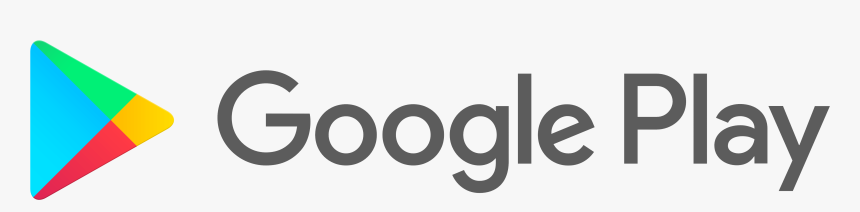

### **This my first Project used pyspark**
I have Google playstore dataset from Kaggle containing informations of different Apps , I are going to analysis based on data

*  Find Top Reviews give to the Apps
*  Find Top 10 Installs give to the Apps
*  Find  Category Wise Disstribution
*   Top paid AppsList item
*   Most Reviewed Apps
*   Price Distribution of Paid Apps

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=636cabb59f0600f9bbc73af49797eeafe4b5023a434373ffee2656e5955610ec
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [3]:
spark =SparkSession.builder.getOrCreate()

In [5]:
#  Create Data Frame
df =spark.read.csv('/content/googleplaystore.csv',header=True,inferSchema=True)

In [6]:
#  show Data Frame
df.show()


+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|      Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design|   January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|  January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|    August 1, 2018|             1.2.4|4.0.3 

In [7]:
#  Check Dataframe
df.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



### **Clean** **Data**

In [8]:
# @title Drop coulmns not Use
df=df.drop('Size','Content Rating','Last Updated','Android Ver','Current Ver')

In [9]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+--------+------+-------+--------+----+-----+------+
|App|Category|Rating|Reviews|Installs|Type|Price|Genres|
+---+--------+------+-------+--------+----+-----+------+
|  0|       0|  1474|      0|       0|   1|    0|     0|
+---+--------+------+-------+--------+----+-----+------+



In [10]:
df.show(3)

+--------------------+--------------+------+-------+----------+----+-----+--------------------+
|                 App|      Category|Rating|Reviews|  Installs|Type|Price|              Genres|
+--------------------+--------------+------+-------+----------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|   10,000+|Free|    0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|  500,000+|Free|    0|Art & Design;Pret...|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|5,000,000+|Free|    0|        Art & Design|
+--------------------+--------------+------+-------+----------+----+-----+--------------------+
only showing top 3 rows



**Correct DataType**

In [11]:
df = df.withColumn('Reviews', col('Reviews').cast(IntegerType()))

In [12]:
# Remove non-numeric characters and convert 'Installs' to IntegerType
df = df.withColumn('Installs', regexp_replace(col('Installs'), '[^0-9]', ''))
df = df.withColumn('Installs', col('Installs').cast(IntegerType()))

In [13]:
df.select('Installs').show(5)

+--------+
|Installs|
+--------+
|   10000|
|  500000|
| 5000000|
|50000000|
|  100000|
+--------+
only showing top 5 rows



In [14]:
# Remove '$' and convert 'Price' to IntegerType
df = df.withColumn("Price", regexp_replace(col("Price"), '[$]',""))
df = df.withColumn('Price', col('Price').cast(IntegerType()))

In [15]:
df.select('price').show(5)

+-----+
|price|
+-----+
|    0|
|    0|
|    0|
|    0|
|    0|
+-----+
only showing top 5 rows



## **Create View**

In [16]:
df.createOrReplaceTempView('Apps')

In [17]:
# @title select view
spark.sql('select * from Apps').show()

+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|                 App|      Category|Rating|Reviews|Installs|Type|Price|              Genres|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|   10000|Free|    0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|  500000|Free|    0|Art & Design;Pret...|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510| 5000000|Free|    0|        Art & Design|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5| 215644|50000000|Free|    0|        Art & Design|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3|    967|  100000|Free|    0|Art & Design;Crea...|
|Paper flowers ins...|ART_AND_DESIGN|   4.4|    167|   50000|Free|    0|        Art & Design|
|Smoke Effect Phot...|ART_AND_DESIGN|   3.8|    178|   50000|Free|    0|        Art & Design|
|    Infinite Painter|ART_AND_DESIGN|   4.1|  36815| 1000000

### **Top  Reviews give to the Apps **

In [18]:
spark.sql('''select APP,Sum(Reviews) from Apps
            group by (APP)
            order by Sum(Reviews) Desc''').show(10)

+--------------------+------------+
|                 APP|sum(Reviews)|
+--------------------+------------+
|           Instagram|   266241989|
|  WhatsApp Messenger|   207348304|
|      Clash of Clans|   179558781|
|Messenger – Text ...|   169932272|
|      Subway Surfers|   166331958|
|    Candy Crush Saga|   156993136|
|            Facebook|   156286514|
|         8 Ball Pool|    99386198|
|        Clash Royale|    92530298|
|            Snapchat|    68045010|
+--------------------+------------+
only showing top 10 rows



### **Top 10 Installs give to the Apps **

In [19]:
spark.sql('''SELECT App, Type, SUM(Installs) AS total_Installs
           FROM Apps
           GROUP BY App, Type
           ORDER BY total_Installs DESC;
          ''').show(10)

+------------------+----+--------------+
|               App|Type|total_Installs|
+------------------+----+--------------+
|    Subway Surfers|Free|    6000000000|
|         Instagram|Free|    4000000000|
|      Google Drive|Free|    4000000000|
|          Hangouts|Free|    4000000000|
|     Google Photos|Free|    4000000000|
|       Google News|Free|    4000000000|
|  Candy Crush Saga|Free|    3500000000|
|WhatsApp Messenger|Free|    3000000000|
|             Gmail|Free|    3000000000|
|      Temple Run 2|Free|    3000000000|
+------------------+----+--------------+
only showing top 10 rows



# Category Wise Disstribution

In [20]:
spark.sql('''SELECT Category, SUM(Installs) AS total_Installs
           FROM Apps
           GROUP BY Category
           ORDER BY total_Installs DESC;
          ''').show(10)

+------------------+--------------+
|          Category|total_Installs|
+------------------+--------------+
|              GAME|   35086024415|
|     COMMUNICATION|   32647276251|
|      PRODUCTIVITY|   14176091369|
|            SOCIAL|   14069867902|
|             TOOLS|   11452771915|
|            FAMILY|   10258263505|
|       PHOTOGRAPHY|   10088247655|
|NEWS_AND_MAGAZINES|    7496317760|
|  TRAVEL_AND_LOCAL|    6868887146|
|     VIDEO_PLAYERS|    6222002720|
+------------------+--------------+
only showing top 10 rows



# **Top paid Apps**

In [21]:
spark.sql('''SELECT App,SUM(price) AS sum_price
           FROM Apps
           where Type='Paid'
           GROUP BY App
           ORDER BY sum_price DESC;
          ''').show(10)

+--------------------+---------+
|                 App|sum_price|
+--------------------+---------+
|I'm Rich - Trump ...|      400|
|most expensive ap...|      399|
|           I am Rich|      399|
|  I AM RICH PRO PLUS|      399|
|  I am rich(premium)|      399|
|      I am Rich Plus|      399|
|I'm Rich/Eu sou R...|      399|
|   I Am Rich Premium|      399|
|       I Am Rich Pro|      399|
|          I am Rich!|      399|
+--------------------+---------+
only showing top 10 rows



# Most Reviewed Apps

In [22]:
# Query to find the most reviewed apps
most_reviewed_apps = spark.sql("""
    SELECT App, Reviews
    FROM Apps
    ORDER BY CAST(Reviews AS INT) DESC
    LIMIT 10
""")

In [23]:
most_reviewed_apps.distinct().show(5)

+------------------+--------+
|               App| Reviews|
+------------------+--------+
|          Facebook|78158306|
|          Facebook|78128208|
|WhatsApp Messenger|69119316|
|WhatsApp Messenger|69109672|
|         Instagram|66577446|
+------------------+--------+
only showing top 5 rows



# Price Distribution of Paid Apps

In [24]:
paid_apps_df = df.filter(df.Price > 0)

# Register the DataFrame as a SQL temporary view
paid_apps_df.createOrReplaceTempView("paid_apps")

# Query to analyze price distribution
price_distribution = spark.sql("""
    SELECT
        CASE
            WHEN Price <= 1 THEN '0-1'
            WHEN Price <= 5 THEN '1-5'
            WHEN Price <= 10 THEN '5-10'
            ELSE '>10'
        END AS Price_Range,
        COUNT(*) AS Count
    FROM paid_apps
    GROUP BY
        CASE
            WHEN Price <= 1 THEN '0-1'
            WHEN Price <= 5 THEN '1-5'
            WHEN Price <= 10 THEN '5-10'
            ELSE '>10'
        END
    ORDER BY Price_Range
""")

# Show the result
price_distribution.show()

+-----------+-----+
|Price_Range|Count|
+-----------+-----+
|        0-1|  135|
|        1-5|  368|
|       5-10|   62|
|        >10|   87|
+-----------+-----+

